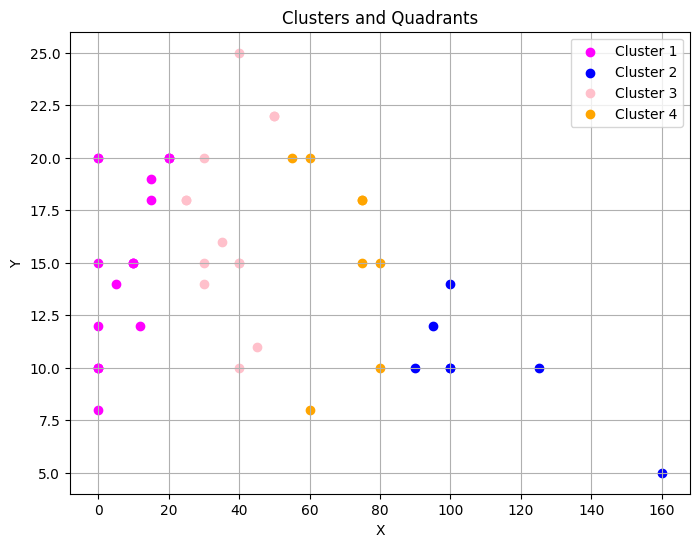

Cluster 1 (Lowest Pitch (Quadrant 1)): [(0, 10), (10, 15), (0, 10), (10, 15), (20, 20), (0, 20), (10, 15), (20, 20), (0, 12), (5, 14), (15, 19), (0, 15), (20, 20), (0, 10), (15, 18), (0, 8), (12, 12), (0, 20)]
Cluster 2 (Medium-Low Pitch (Quadrant 2)): [(90, 10), (160, 5), (100, 10), (95, 12), (100, 10), (100, 14), (125, 10)]
Cluster 3 (Highest Pitch (Quadrant 3)): [(30, 20), (40, 15), (30, 15), (40, 10), (40, 15), (30, 14), (45, 11), (40, 25), (35, 16), (25, 18), (50, 22), (25, 18), (50, 22)]
Cluster 4 (Medium-High Pitch (Quadrant 4)): [(80, 10), (60, 8), (60, 20), (80, 15), (55, 20), (75, 15), (75, 18), (75, 18)]


In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

datasets = [
    {"x": [0, 10, 30, 40, 90], "y": [10, 15, 20, 15, 10]},
    {"x": [0, 10, 20, 30, 40], "y": [10, 15, 20, 15, 10]},
    {"x": [0, 10, 20, 40, 80, 160], "y": [20, 15, 20, 15, 10, 5]},
    {"x": [0, 5, 15, 30, 45, 60], "y": [12, 14, 19, 14, 11, 8]},
    {"x": [0, 20, 40, 60, 80, 100], "y": [15, 20, 25, 20, 15, 10]},
    {"x": [0, 15, 35, 55, 75, 95], "y": [10, 18, 16, 20, 15, 12]},
    {"x": [0, 12, 25, 50, 75, 100], "y": [8, 12, 18, 22, 18, 10]},
    {"x": [0, 25, 50, 75, 100, 125], "y": [20, 18, 22, 18, 14, 10]},
]

points = []
for dataset in datasets:
    for x, y in zip(dataset['x'], dataset['y']):
        points.append([x, y])

points = np.array(points)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(points)

cluster_quadrants = {i: [] for i in range(4)}

for i, (x, y) in enumerate(points):
    cluster_quadrants[labels[i]].append((x, y))

plt.figure(figsize=(8, 6))
colors = ['magenta', 'blue', 'pink', 'orange']
for label, cluster in cluster_quadrants.items():
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[label], label=f'Cluster {label+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters and Quadrants')
plt.legend()
plt.grid()
plt.show()

pitch_mapping = {
    0: "Lowest Pitch (Quadrant 1)",
    1: "Medium-Low Pitch (Quadrant 2)",
    2: "Highest Pitch (Quadrant 3)",
    3: "Medium-High Pitch (Quadrant 4)"
}
for cluster, points in cluster_quadrants.items():
    print(f"Cluster {cluster+1} ({pitch_mapping[cluster]}): {points}")


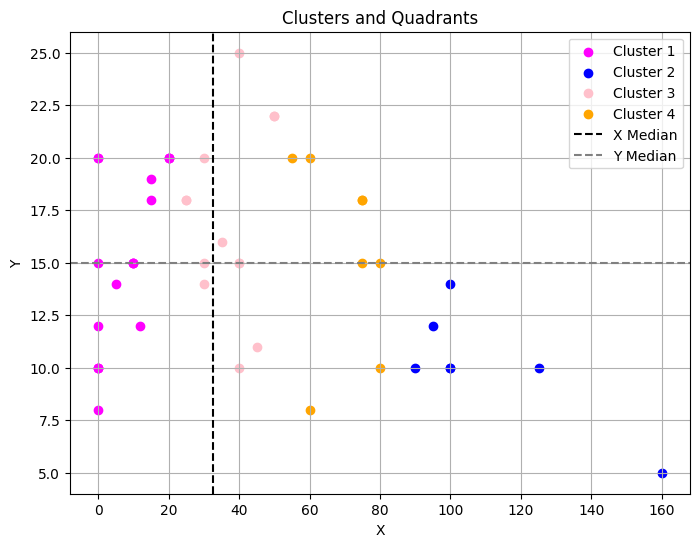

Cluster 1 Pitches:
  Point (0, 10) => Lowest Pitch (Quadrant 1)
  Point (10, 15) => Highest Pitch (Quadrant 4)
  Point (0, 10) => Lowest Pitch (Quadrant 1)
  Point (10, 15) => Highest Pitch (Quadrant 4)
  Point (20, 20) => Highest Pitch (Quadrant 4)
  Point (0, 20) => Highest Pitch (Quadrant 4)
  Point (10, 15) => Highest Pitch (Quadrant 4)
  Point (20, 20) => Highest Pitch (Quadrant 4)
  Point (0, 12) => Lowest Pitch (Quadrant 1)
  Point (5, 14) => Lowest Pitch (Quadrant 1)
  Point (15, 19) => Highest Pitch (Quadrant 4)
  Point (0, 15) => Highest Pitch (Quadrant 4)
  Point (20, 20) => Highest Pitch (Quadrant 4)
  Point (0, 10) => Lowest Pitch (Quadrant 1)
  Point (15, 18) => Highest Pitch (Quadrant 4)
  Point (0, 8) => Lowest Pitch (Quadrant 1)
  Point (12, 12) => Lowest Pitch (Quadrant 1)
  Point (0, 20) => Highest Pitch (Quadrant 4)
Cluster 2 Pitches:
  Point (90, 10) => Medium-Low Pitch (Quadrant 2)
  Point (160, 5) => Medium-Low Pitch (Quadrant 2)
  Point (100, 10) => Medium-Low P

In [5]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

datasets = [
    {"x": [0, 10, 30, 40, 90], "y": [10, 15, 20, 15, 10]},
    {"x": [0, 10, 20, 30, 40], "y": [10, 15, 20, 15, 10]},
    {"x": [0, 10, 20, 40, 80, 160], "y": [20, 15, 20, 15, 10, 5]},
    {"x": [0, 5, 15, 30, 45, 60], "y": [12, 14, 19, 14, 11, 8]},
    {"x": [0, 20, 40, 60, 80, 100], "y": [15, 20, 25, 20, 15, 10]},
    {"x": [0, 15, 35, 55, 75, 95], "y": [10, 18, 16, 20, 15, 12]},
    {"x": [0, 12, 25, 50, 75, 100], "y": [8, 12, 18, 22, 18, 10]},
    {"x": [0, 25, 50, 75, 100, 125], "y": [20, 18, 22, 18, 14, 10]},
]

points = []
for dataset in datasets:
    for x, y in zip(dataset["x"], dataset["y"]):
        points.append([x, y])

points = np.array(points)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(points)

def assign_quadrant(x, y):
    if y >= np.median(points[:, 1]) and x >= np.median(points[:, 0]):
        return 2  # Medium-high pitch
    elif y >= np.median(points[:, 1]) and x < np.median(points[:, 0]):
        return 3  # Highest pitch
    elif y < np.median(points[:, 1]) and x < np.median(points[:, 0]):
        return 0  # Lowest pitch
    else:
        return 1  # Medium-low pitch

quadrant_labels = [assign_quadrant(x, y) for x, y in points]

merged_labels = [f"Cluster {label} (Quadrant {q_label})" for label, q_label in zip(labels, quadrant_labels)]

cluster_quadrants = {i: [] for i in range(4)}
for i, (x, y) in enumerate(points):
    cluster_quadrants[labels[i]].append((x, y, quadrant_labels[i]))

plt.figure(figsize=(8, 6))
colors = ["magenta", "blue", "pink", "orange"]
for label in range(4):
    cluster_points = np.array([point[:2] for point in cluster_quadrants[label]])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[label], label=f"Cluster {label+1}")

plt.axvline(np.median(points[:, 0]), color="black", linestyle="--", label="X Median")
plt.axhline(np.median(points[:, 1]), color="gray", linestyle="--", label="Y Median")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clusters and Quadrants")
plt.legend()
plt.grid()
plt.show()

# Map pitches based on quadrants
pitch_mapping = {
    0: "Lowest Pitch (Quadrant 1)",
    1: "Medium-Low Pitch (Quadrant 2)",
    2: "Medium-High Pitch (Quadrant 3)",
    3: "Highest Pitch (Quadrant 4)",
}

for cluster, points in cluster_quadrants.items():
    print(f"Cluster {cluster+1} Pitches:")
    for x, y, quadrant in points:
        print(f"  Point ({x}, {y}) => {pitch_mapping[quadrant]}")


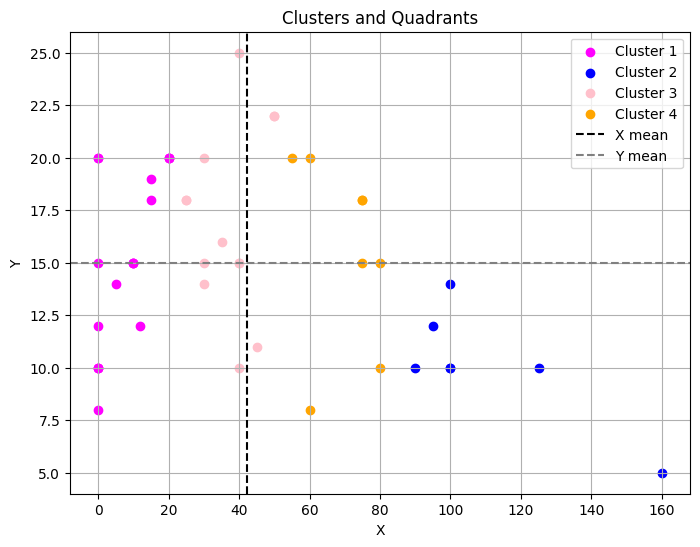

Cluster 1 Pitches:
  Point (0, 10) => Lowest Pitch (Quadrant 1)
  Point (10, 15) => Highest Pitch (Quadrant 4)
  Point (0, 10) => Lowest Pitch (Quadrant 1)
  Point (10, 15) => Highest Pitch (Quadrant 4)
  Point (20, 20) => Highest Pitch (Quadrant 4)
  Point (0, 20) => Highest Pitch (Quadrant 4)
  Point (10, 15) => Highest Pitch (Quadrant 4)
  Point (20, 20) => Highest Pitch (Quadrant 4)
  Point (0, 12) => Lowest Pitch (Quadrant 1)
  Point (5, 14) => Lowest Pitch (Quadrant 1)
  Point (15, 19) => Highest Pitch (Quadrant 4)
  Point (0, 15) => Highest Pitch (Quadrant 4)
  Point (20, 20) => Highest Pitch (Quadrant 4)
  Point (0, 10) => Lowest Pitch (Quadrant 1)
  Point (15, 18) => Highest Pitch (Quadrant 4)
  Point (0, 8) => Lowest Pitch (Quadrant 1)
  Point (12, 12) => Lowest Pitch (Quadrant 1)
  Point (0, 20) => Highest Pitch (Quadrant 4)
Cluster 2 Pitches:
  Point (90, 10) => Medium-Low Pitch (Quadrant 2)
  Point (160, 5) => Medium-Low Pitch (Quadrant 2)
  Point (100, 10) => Medium-Low P

In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

datasets = [
    {"x": [0, 10, 30, 40, 90], "y": [10, 15, 20, 15, 10]},
    {"x": [0, 10, 20, 30, 40], "y": [10, 15, 20, 15, 10]},
    {"x": [0, 10, 20, 40, 80, 160], "y": [20, 15, 20, 15, 10, 5]},
    {"x": [0, 5, 15, 30, 45, 60], "y": [12, 14, 19, 14, 11, 8]},
    {"x": [0, 20, 40, 60, 80, 100], "y": [15, 20, 25, 20, 15, 10]},
    {"x": [0, 15, 35, 55, 75, 95], "y": [10, 18, 16, 20, 15, 12]},
    {"x": [0, 12, 25, 50, 75, 100], "y": [8, 12, 18, 22, 18, 10]},
    {"x": [0, 25, 50, 75, 100, 125], "y": [20, 18, 22, 18, 14, 10]},
]

points = []
for dataset in datasets:
    for x, y in zip(dataset["x"], dataset["y"]):
        points.append([x, y])

points = np.array(points)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(points)

def assign_quadrant(x, y):
    if y >= np.mean(points[:, 1]) and x >= np.mean(points[:, 0]):
        return 2  # Medium-high pitch
    elif y >= np.mean(points[:, 1]) and x < np.mean(points[:, 0]):
        return 3  # Highest pitch
    elif y < np.mean(points[:, 1]) and x < np.mean(points[:, 0]):
        return 0  # Lowest pitch
    else:
        return 1  # Medium-low pitch

quadrant_labels = [assign_quadrant(x, y) for x, y in points]

merged_labels = [f"Cluster {label} (Quadrant {q_label})" for label, q_label in zip(labels, quadrant_labels)]

cluster_quadrants = {i: [] for i in range(4)}
for i, (x, y) in enumerate(points):
    cluster_quadrants[labels[i]].append((x, y, quadrant_labels[i]))

plt.figure(figsize=(8, 6))
colors = ["magenta", "blue", "pink", "orange"]
for label in range(4):
    cluster_points = np.array([point[:2] for point in cluster_quadrants[label]])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[label], label=f"Cluster {label+1}")

plt.axvline(np.mean(points[:, 0]), color="black", linestyle="--", label="X mean")
plt.axhline(np.mean(points[:, 1]), color="gray", linestyle="--", label="Y mean")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clusters and Quadrants")
plt.legend()
plt.grid()
plt.show()

# Mapping pitch to quadrant
pitch_mapping = {
    0: "Lowest Pitch (Quadrant 1)",
    1: "Medium-Low Pitch (Quadrant 2)",
    2: "Medium-High Pitch (Quadrant 3)",
    3: "Highest Pitch (Quadrant 4)",
}
for cluster, points in cluster_quadrants.items():
    print(f"Cluster {cluster+1} Pitches:")
    for x, y, quadrant in points:
        print(f"  Point ({x}, {y}) => {pitch_mapping[quadrant]}")

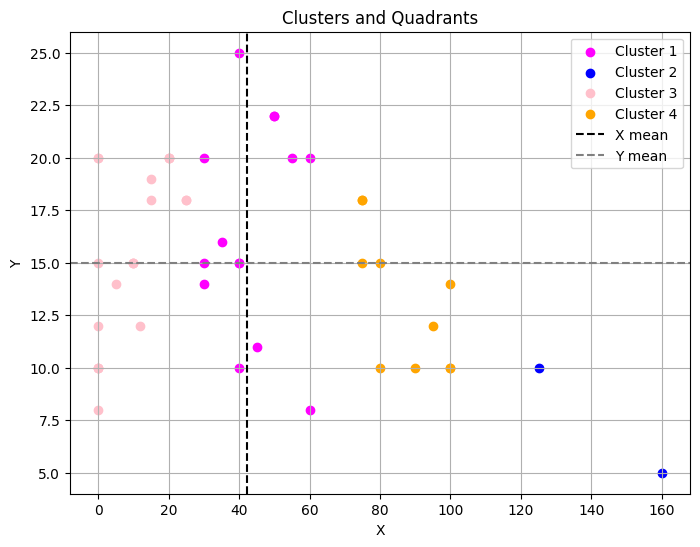

Cluster 1 Pitches:
  Point (30, 20) => Highest Pitch (Quadrant 4)
  Point (40, 15) => Highest Pitch (Quadrant 4)
  Point (30, 15) => Highest Pitch (Quadrant 4)
  Point (40, 10) => Lowest Pitch (Quadrant 1)
  Point (40, 15) => Highest Pitch (Quadrant 4)
  Point (30, 14) => Lowest Pitch (Quadrant 1)
  Point (45, 11) => Medium-Low Pitch (Quadrant 2)
  Point (60, 8) => Medium-Low Pitch (Quadrant 2)
  Point (40, 25) => Highest Pitch (Quadrant 4)
  Point (60, 20) => Medium-High Pitch (Quadrant 3)
  Point (35, 16) => Highest Pitch (Quadrant 4)
  Point (55, 20) => Medium-High Pitch (Quadrant 3)
  Point (50, 22) => Medium-High Pitch (Quadrant 3)
  Point (50, 22) => Medium-High Pitch (Quadrant 3)
Cluster 2 Pitches:
  Point (160, 5) => Medium-Low Pitch (Quadrant 2)
  Point (125, 10) => Medium-Low Pitch (Quadrant 2)
Cluster 3 Pitches:
  Point (0, 10) => Lowest Pitch (Quadrant 1)
  Point (10, 15) => Highest Pitch (Quadrant 4)
  Point (0, 10) => Lowest Pitch (Quadrant 1)
  Point (10, 15) => Highest 

In [3]:
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

datasets = [
    {"x": [0, 10, 30, 40, 90], "y": [10, 15, 20, 15, 10]},
    {"x": [0, 10, 20, 30, 40], "y": [10, 15, 20, 15, 10]},
    {"x": [0, 10, 20, 40, 80, 160], "y": [20, 15, 20, 15, 10, 5]},
    {"x": [0, 5, 15, 30, 45, 60], "y": [12, 14, 19, 14, 11, 8]},
    {"x": [0, 20, 40, 60, 80, 100], "y": [15, 20, 25, 20, 15, 10]},
    {"x": [0, 15, 35, 55, 75, 95], "y": [10, 18, 16, 20, 15, 12]},
    {"x": [0, 12, 25, 50, 75, 100], "y": [8, 12, 18, 22, 18, 10]},
    {"x": [0, 25, 50, 75, 100, 125], "y": [20, 18, 22, 18, 14, 10]},
]

points = []
for i in datasets:
    for x, y in zip(i["x"], i["y"]):
        points.append([x, y])

points = np.array(points)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=100)
labels = kmeans.fit_predict(points)

def assign_quadrant(x, y, points):
    x_mean = np.mean(points[:, 0])
    y_mean = np.mean(points[:, 1])

    if y >= y_mean and x >= x_mean:
        return 2  # Medium-high pitch
    elif y >= y_mean and x < x_mean:
        return 3  # Highest pitch
    elif y < y_mean and x < x_mean:
        return 0  # Lowest pitch
    else:
        return 1  # Medium-low pitch

quadrant_labels = [assign_quadrant(x, y, points) for x, y in points]

merged_labels = [f"Cluster {label} (Quadrant {q_label})" for label, q_label in zip(labels, quadrant_labels)]

cluster_quadrants = {i: [] for i in range(4)}
for i, (x, y) in enumerate(points):
    cluster_quadrants[labels[i]].append((x, y, quadrant_labels[i]))

plt.figure(figsize=(8, 6))
colors = ["magenta", "blue", "pink", "orange"]
for label in range(4):
    cluster_points = np.array([point[:2] for point in cluster_quadrants[label]])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[label], label=f"Cluster {label+1}")

plt.axvline(np.mean(points[:, 0]), color="black", linestyle="--", label="X mean")
plt.axhline(np.mean(points[:, 1]), color="gray", linestyle="--", label="Y mean")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clusters and Quadrants")
plt.legend()
plt.grid()
plt.show()

pitch_mapping = {
    0: "Lowest Pitch (Quadrant 1)",
    1: "Medium-Low Pitch (Quadrant 2)",
    2: "Medium-High Pitch (Quadrant 3)",
    3: "Highest Pitch (Quadrant 4)",
}
for cluster, points in cluster_quadrants.items():
    print(f"Cluster {cluster+1} Pitches:")
    for x, y, quadrant in points:
        print(f"  Point ({x}, {y}) => {pitch_mapping[quadrant]}")



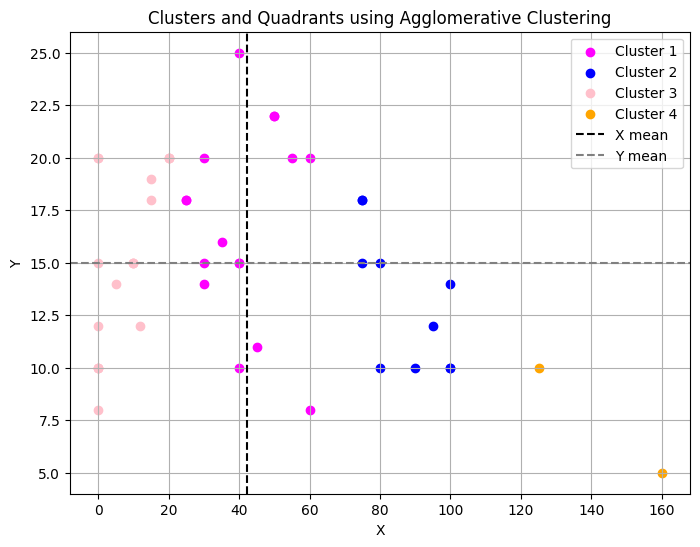

Cluster 1 Pitches:
  Point (30, 20) => Highest Pitch (Quadrant 4)
  Point (40, 15) => Highest Pitch (Quadrant 4)
  Point (30, 15) => Highest Pitch (Quadrant 4)
  Point (40, 10) => Lowest Pitch (Quadrant 1)
  Point (40, 15) => Highest Pitch (Quadrant 4)
  Point (30, 14) => Lowest Pitch (Quadrant 1)
  Point (45, 11) => Medium-Low Pitch (Quadrant 2)
  Point (60, 8) => Medium-Low Pitch (Quadrant 2)
  Point (40, 25) => Highest Pitch (Quadrant 4)
  Point (60, 20) => Medium-High Pitch (Quadrant 3)
  Point (35, 16) => Highest Pitch (Quadrant 4)
  Point (55, 20) => Medium-High Pitch (Quadrant 3)
  Point (25, 18) => Highest Pitch (Quadrant 4)
  Point (50, 22) => Medium-High Pitch (Quadrant 3)
  Point (25, 18) => Highest Pitch (Quadrant 4)
  Point (50, 22) => Medium-High Pitch (Quadrant 3)
Cluster 2 Pitches:
  Point (90, 10) => Medium-Low Pitch (Quadrant 2)
  Point (80, 10) => Medium-Low Pitch (Quadrant 2)
  Point (80, 15) => Medium-High Pitch (Quadrant 3)
  Point (100, 10) => Medium-Low Pitch (Q

In [2]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

datasets = [
    {"x": [0, 10, 30, 40, 90], "y": [10, 15, 20, 15, 10]},
    {"x": [0, 10, 20, 30, 40], "y": [10, 15, 20, 15, 10]},
    {"x": [0, 10, 20, 40, 80, 160], "y": [20, 15, 20, 15, 10, 5]},
    {"x": [0, 5, 15, 30, 45, 60], "y": [12, 14, 19, 14, 11, 8]},
    {"x": [0, 20, 40, 60, 80, 100], "y": [15, 20, 25, 20, 15, 10]},
    {"x": [0, 15, 35, 55, 75, 95], "y": [10, 18, 16, 20, 15, 12]},
    {"x": [0, 12, 25, 50, 75, 100], "y": [8, 12, 18, 22, 18, 10]},
    {"x": [0, 25, 50, 75, 100, 125], "y": [20, 18, 22, 18, 14, 10]},
]

points = []
for dataset in datasets:
    for x, y in zip(dataset["x"], dataset["y"]):
        points.append([x, y])

points = np.array(points)

agg_clustering = AgglomerativeClustering(n_clusters=4)
labels = agg_clustering.fit_predict(points)

def assign_quadrant(x, y):
    if y >= np.mean(points[:, 1]) and x >= np.mean(points[:, 0]):
        return 2  # Medium-high pitch
    elif y >= np.mean(points[:, 1]) and x < np.mean(points[:, 0]):
        return 3  # Highest pitch
    elif y < np.mean(points[:, 1]) and x < np.mean(points[:, 0]):
        return 0  # Lowest pitch
    else:
        return 1  # Medium-low pitch

quadrant_labels = [assign_quadrant(x, y) for x, y in points]

cluster_quadrants = {i: [] for i in range(4)}
for i, (x, y) in enumerate(points):
    cluster_quadrants[labels[i]].append((x, y, quadrant_labels[i]))

plt.figure(figsize=(8, 6))
colors = ["magenta", "blue", "pink", "orange"]
for label in range(4):
    cluster_points = np.array([point[:2] for point in cluster_quadrants[label]])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[label], label=f"Cluster {label+1}")

plt.axvline(np.mean(points[:, 0]), color="black", linestyle="--", label="X mean")
plt.axhline(np.mean(points[:, 1]), color="gray", linestyle="--", label="Y mean")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clusters and Quadrants using Agglomerative Clustering")
plt.legend()
plt.grid()
plt.show()

# Mapping pitch to quadrant
pitch_mapping = {
    0: "Lowest Pitch (Quadrant 1)",
    1: "Medium-Low Pitch (Quadrant 2)",
    2: "Medium-High Pitch (Quadrant 3)",
    3: "Highest Pitch (Quadrant 4)",
}

for cluster, points in cluster_quadrants.items():
    print(f"Cluster {cluster+1} Pitches:")
    for x, y, quadrant in points:
        print(f"  Point ({x}, {y}) => {pitch_mapping[quadrant]}")